In [315]:
import pandas as pd
import numpy as np
import os
import sys
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [316]:
df = pd.read_csv(r'E:\All project file\customer_categorisation\data\raw\marketing_campaign.csv', sep=',' )

In [317]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [318]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [319]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


```markdown
### Feature Information

#### People
- **ID**: Customer's unique identifier.
- **Year_Birth**: Customer's birth year.
- **Education**: Customer's education level.
- **Marital_Status**: Customer's marital status.
- **Income**: Customer's yearly household income.
- **Kidhome**: Number of children in customer's household.
- **Teenhome**: Number of teenagers in customer's household.
- **Dt_Customer**: Date of customer's enrollment with the company.
- **Recency**: Number of days since customer's last purchase.
- **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise.

#### Products
- **MntWines**: Amount spent on wine in the last 2 years.
- **MntFruits**: Amount spent on fruits in the last 2 years.
- **MntMeatProducts**: Amount spent on meat in the last 2 years.
- **MntFishProducts**: Amount spent on fish in the last 2 years.
- **MntSweetProducts**: Amount spent on sweets in the last 2 years.
- **MntGoldProds**: Amount spent on gold in the last 2 years.

#### Promotion
- **NumDealsPurchases**: Number of purchases made with a discount.
- **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise.
- **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.
- **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.
- **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise.
- **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise.
- **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise.

#### Place
- **NumWebPurchases**: Number of purchases made through the company’s website.
- **NumCatalogPurchases**: Number of purchases made using a catalogue.
- **NumStorePurchases**: Number of purchases made directly in stores.
- **NumWebVisitsMonth**: Number of visits to the company’s website in the last month.
```

In [320]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [321]:
df.Income.isnull().sum()

24

In [322]:
df.Income.unique()

array([58138., 46344., 71613., ..., 56981., 69245., 52869.])

In [323]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer'].head(5)


0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [324]:
# define numerical & categorical columns
#drop the ID column
columns=[col for col in df.columns if col != 'ID']

numeric_features = [feature for feature in columns if df[feature].dtype != 'object' ]
categorical_features = [feature for feature in columns if df[feature].dtype == 'O']

for col in categorical_features:
    print(f"{col} :> {df[col].unique()} unique values")

Education :> ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle'] unique values
Marital_Status :> ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO'] unique values


In [325]:
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 26 numerical features : ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

We have 2 categorical features : ['Education', 'Marital_Status']


In [326]:
df[categorical_features[0]].value_counts().count()

5

In [327]:

# proportion of count data on categorical columns
for col in categorical_features:
    print(f"Proportion of {col} :> \n{df[col].value_counts(normalize=True)*100}")
    print('---------------------------')

Proportion of Education :> 
Graduation    50.312500
PhD           21.696429
Master        16.517857
2n Cycle       9.062500
Basic          2.410714
Name: Education, dtype: float64
---------------------------
Proportion of Marital_Status :> 
Married     38.571429
Together    25.892857
Single      21.428571
Divorced    10.357143
Widow        3.437500
Alone        0.133929
Absurd       0.089286
YOLO         0.089286
Name: Marital_Status, dtype: float64
---------------------------


# Univariate Analysis
.The purpose of univariate analysis is to understand the distribution of values for a single variable.
.Other Type of Analysis are
### Bivariate Analysis: The analysis of two variables.
### Multivariate Analysis: The analysis of two or more variables.

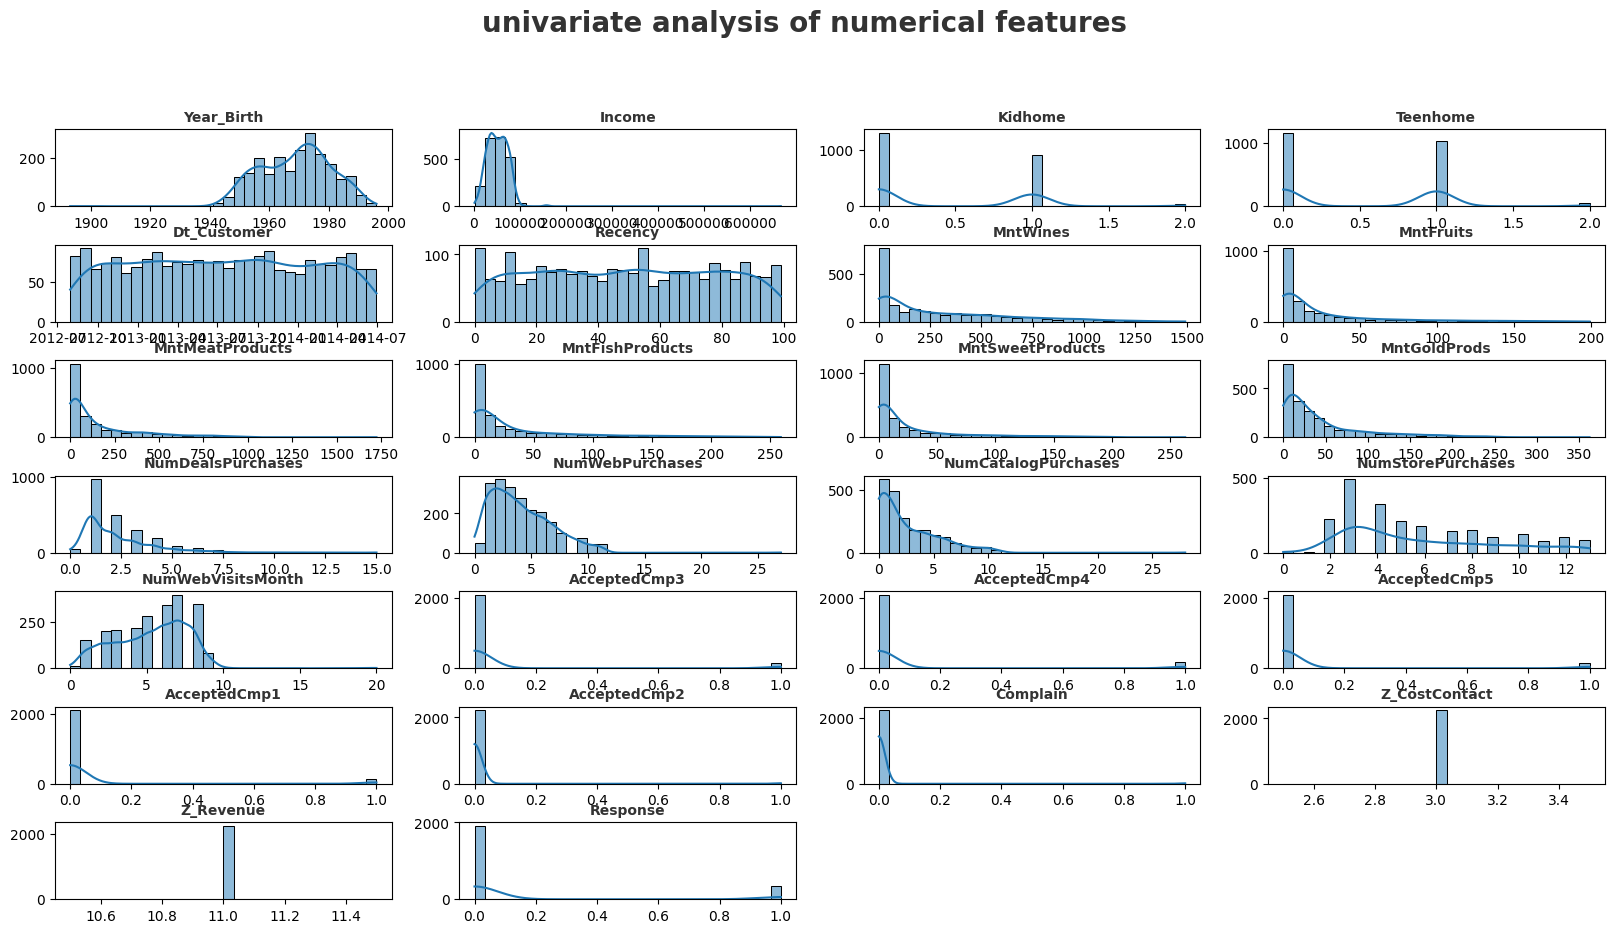

In [328]:
plt.figure(figsize=(20, 10))
plt.suptitle('univariate analysis of numerical features', fontsize=20, fontweight='bold',alpha=0.8,y=1)
for i, feature in enumerate(numeric_features):
    plt.subplot(7, 4, i + 1)
    plt.subplots_adjust(hspace=0.5)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(feature, fontsize=10, fontweight='bold', alpha=0.8)
    plt.xlabel('')
    plt.ylabel('')



```markdown
### Observations on Data Distribution

1. **Year_Birth**: Left-skewed, most values fall in the 1940-2000 range and contain outliers.
2. **Income**: Right-skewed, most values fall in the 0 - <200000 range and contain outliers.
3. **Kidhome, Teenhome**: Constant values, most values are 0 or 1, with some values as 2.
4. **Dt_Customer, Recency**: Follow a normal distribution.
5. **MntWines, MntMeatProducts**: Right-skewed, most values fall in the 0 - 500 range and contain outliers.
6. **MntFruits, MntFishProducts, MntSweetProducts, MntGoldProds**: Right-skewed, most values fall in the 0 - 50 range and contain outliers.
7. **NumDealsPurchases**: Right-skewed, most values fall in the 0 - 5 range and contain outliers.
8. **NumWebPurchases, NumCatalogPurchases**: Right-skewed, most values fall in the 0 - 10 range and contain outliers.
9. **NumStorePurchases**: Almost follows a normal distribution, most values fall in the 1 - 10 range and contain outliers.
10. **NumWebVisitsMonth**: Right-skewed, most values fall in the 0 - 10 range and contain outliers.
11. **AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2**: Right-skewed, most values are 0, with some values as 1.
12. **Complain**: Most values are 0, with a small proportion as 1.
13. **Z_CostContact, Z_Revenue**: Not showing any graph; will graph separately to investigate further.
14. **Response**: Constant values of 0 and 1.

### Note
- The univariate analysis highlights the need for potential data transformations, such as scaling or normalization, for features with skewed distributions.  
- Features with outliers, such as `Income` and `MntWines`, may require capping or removal to improve model performance.  
- The limited range of values in features like `Kidhome` and `Teenhome` suggests they may be better suited for categorical encoding.  
- Uniformly distributed features, such as `Dt_Customer`, may not require significant preprocessing but could be useful for time-based analysis.  
- Insights from this analysis will guide feature engineering and selection for downstream tasks.

In [329]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

<AxesSubplot: >

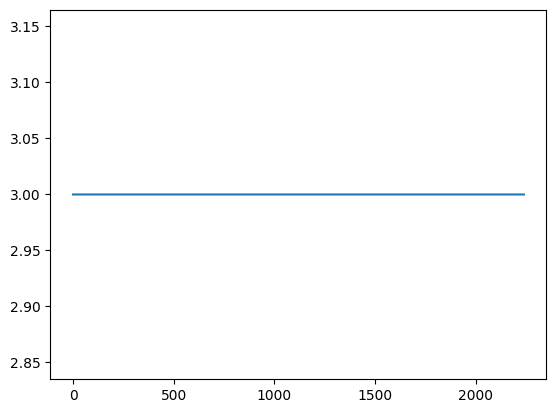

In [330]:
#checking the correlation between numerical features
df.Z_CostContact.plot()


<AxesSubplot: >

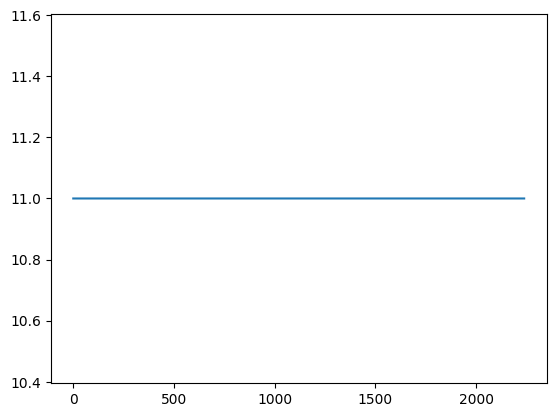

In [331]:
df.Z_Revenue.plot()
#checking the correlation between the numerical features


### As we can see

The column Z_CostContact, Z_Revenue does have constant values. As this columns does not have any varience, we can drop this column

In [332]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'],inplace=True)
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

# Categorical Features


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Single'),
  Text(1, 0, 'Together'),
  Text(2, 0, 'Married'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Widow'),
  Text(5, 0, 'Alone'),
  Text(6, 0, 'Absurd'),
  Text(7, 0, 'YOLO')])

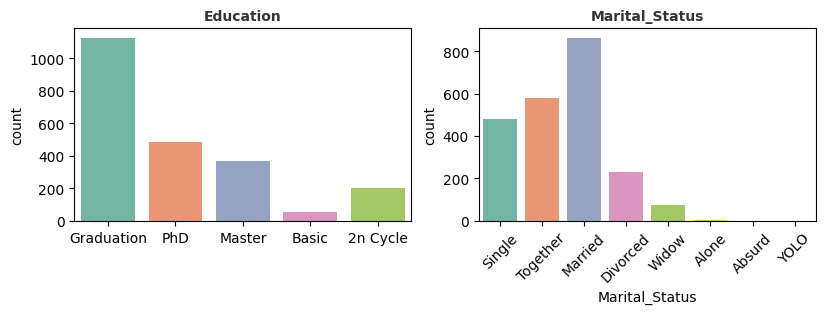

In [333]:
plt.figure(figsize=(20, 10))
for feat in categorical_features:
    plt.subplot(3, 4, categorical_features.index(feat) + 1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x=feat, data=df, palette='Set2')
    plt.title(feat, fontsize=10, fontweight='bold', alpha=0.8)
    plt.xlabel('')
    plt.ylabel(f"count")
sns.countplot(x='Marital_Status', data=df, palette='Set2')
plt.xticks(rotation=45)

```markdown
### Report

#### Column: Education
- Most of the customers fall into the **Graduation** category.
- Other categories include **PhD**, **Master**, **Basic**, and **2n Cycle**.
- **2n Cycle**: Multidisciplinary degree programmes that meet the requirements of two different classes.

#### Column: Marital_Status
- Approximately 864 customers are **Married**.
- Other noticeable categories include **Together**, **Single**, **Divorced**, and **Widow**.
- Categories such as **Alone**, **Absurd**, and **YOLO** have very few customers.
```

In [334]:
## count feature based on year

<AxesSubplot: xlabel='year'>

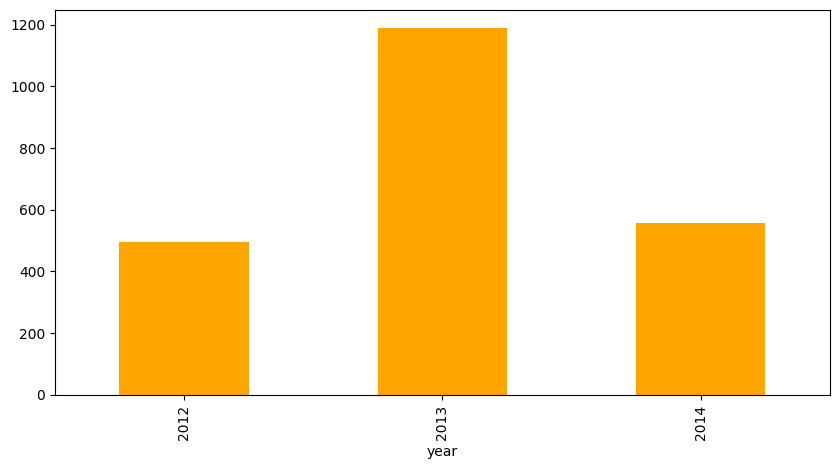

In [335]:
df1= df.copy()
df1['year'] = df['Dt_Customer'].dt.year
df1.groupby("year")['ID'].count().plot(kind='bar', figsize=(10, 5), color='orange')

### Report

* By this report, we can say that, most number of customers have joined in the year 2013
* The number of customers got increased in year 2013 but in the year 2014, the number of customers got decreased.

In [336]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [337]:
print(numeric_features)

['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


### Multivariate Analysis
* Multivariate analysis is the analysis of more than one variable.

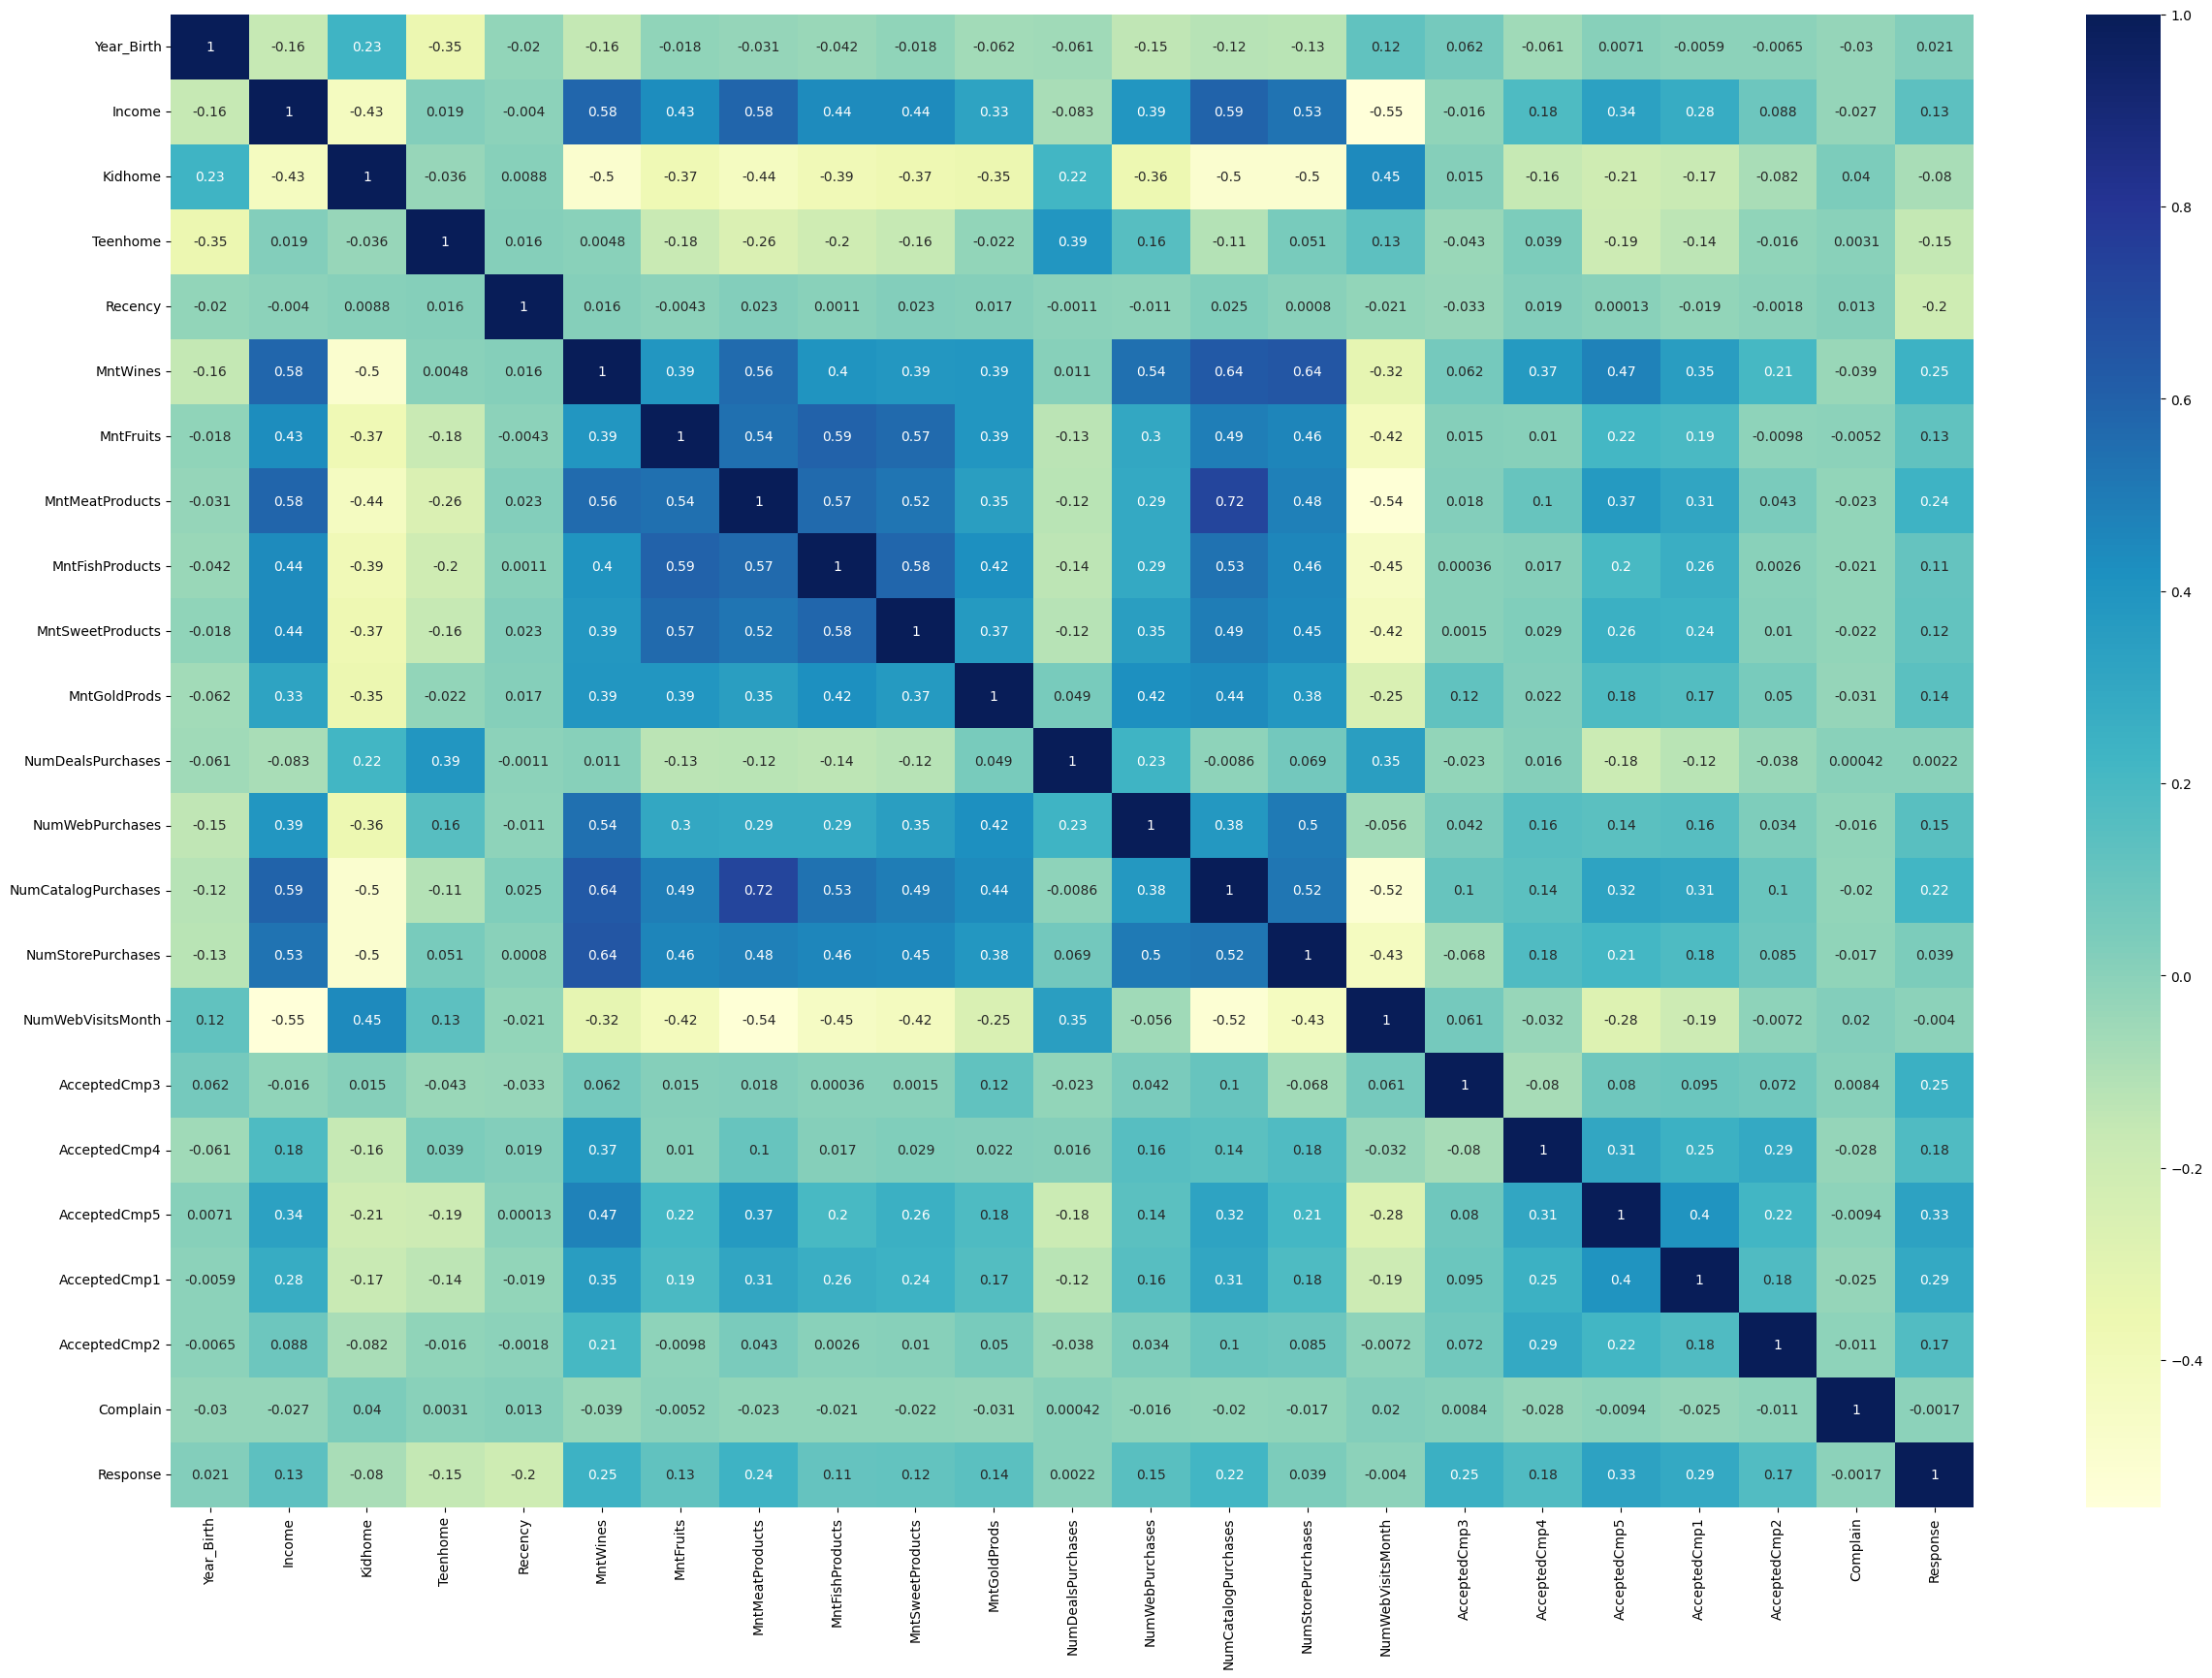

In [338]:
plt.figure(figsize=(30, 20))
numric=numeric_features
numric.remove('Z_CostContact')
numric.remove('Z_Revenue')
sns.heatmap(df[numric].corr(), annot=True, cmap='YlGnBu')
plt.show()

### We can see that income does has some null values. Let's first input those values

In [339]:
df.Income.fillna(df.Income.median(), inplace=True)

In [340]:
df.Income.isnull().sum()

0

In [341]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

# Feature extraction

In [342]:
from datetime import datetime

raw_df = df.copy() #saving the raw dataframe for reference


##  creating a new field to store the Age of the customer
df['Age'] = datetime.now().year - df['Year_Birth']

## ###  recoding the customer's education level to numeric form (0: high-school, 1: diploma, 2: bachelors, 3: masters, and 4: doctorates)
df['Education'] = df['Education'].replace({'Basic': 0, 'Graduation': 1, 'Master': 2, 'PhD': 3, '2n Cycle': 4})

## ###  recoding the customer's marital status to numeric form (0: single, 1: married, and 2: divorced)
df['Marital_Status'] = df['Marital_Status'].replace({'Single':0, 'Together':1, 'Married':1, 'Divorced':0, 'Widow':0, 'Alone':0, 'Absurd':0, 'YOLO':0})

## ###  recoding the customer's income level to numeric form (0: low, 1: medium, and 2: high)
# df['Income'] = df['Income'].replace({'Low': 0, 'Medium': 1, 'High': 2})

## ###  creating a new field to store the total number of children in the family
df['Children'] = df['Kidhome'] + df['Teenhome']

## ###  creating a new field to store the total number of family members in the family
df['Family_Size'] = df['Marital_Status'] + df['Children'] + 1 # +1 for the customer marital status couple

## ###  creating a new field to store the total spend 
df['total_spend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['total_no_shopp'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

## The following code works out how long the customer has been with the company and store the total number of promotions the customers responded to
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
today=datetime.today()
df['Days_as_Customer']=(today-df['Dt_Customer']).dt.days
df['Offers_Responded_To']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df["Parental Status"] = np.where(df["Children"] > 0, 1, 0)

#dropping columns which are already used to create new features
columns_to_drop = ['Year_Birth','Kidhome','Teenhome']
df.drop(columns = columns_to_drop, axis = 1, inplace=True)
df.rename(columns={"Marital_Status": "Marital Status","MntWines": "Wines","MntFruits":"Fruits",
                   "MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets",
                   "MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog",
                   "NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"},
          inplace = True)



In [343]:
raw_df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [345]:
df = df[["Age","Education","Marital Status","Parental Status","Children","Income","total_spend","Days_as_Customer","Recency","Wines","Fruits","Meat","Fish","Sweets","Gold","Web","Catalog","Store","Discount Purchases","total_no_shopp","NumWebVisitsMonth"]]

In [346]:
df.head(5)

,Age,Education,Marital Status,Parental Status,Children,Income,total_spend,Days_as_Customer,Recency,Wines,...,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,total_no_shopp,NumWebVisitsMonth
0,68,1,0,0,0,58138.0,1617,4628,58,635,...,546,172,88,88,8,10,4,3,25,7
1,71,1,0,1,2,46344.0,27,4078,38,11,...,6,2,1,6,1,1,2,2,6,5
2,60,1,1,0,0,71613.0,776,4277,26,426,...,127,111,21,42,8,2,10,1,21,4
3,41,1,1,1,1,26646.0,53,4104,26,11,...,20,10,3,5,2,0,4,2,8,6
4,44,3,1,1,1,58293.0,422,4126,94,173,...,118,46,27,15,5,3,6,5,19,5


In [347]:
df.describe()

,Age,Education,Marital Status,Parental Status,Children,Income,total_spend,Days_as_Customer,Recency,Wines,...,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,total_no_shopp,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,56.194196,1.846875,0.644643,0.715179,0.950446,52237.975446,605.798214,4318.582143,49.109375,303.935714,...,166.950000,37.525446,27.062946,44.021875,4.084821,2.662054,5.790179,2.325000,14.862054,5.316518
std,11.984069,1.075215,0.478728,0.451430,0.751803,25037.955891,602.249288,202.122512,28.962453,336.597393,...,225.715373,54.628979,41.280498,52.167439,2.778714,2.923101,3.250958,1.932238,7.677173,2.426645
min,29.000000,0.000000,0.000000,0.000000,0.000000,1730.000000,5.000000,3965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,0.000000,0.000000,0.000000,35538.750000,68.750000,4145.750000,24.000000,23.750000,...,16.000000,3.000000,1.000000,9.000000,2.000000,0.000000,3.000000,1.000000,8.000000,3.000000
50%,55.000000,1.000000,1.000000,1.000000,1.000000,51381.500000,396.000000,4320.500000,49.000000,173.500000,...,67.000000,12.000000,8.000000,24.000000,4.000000,2.000000,5.000000,2.000000,15.000000,6.000000
75%,66.000000,3.000000,1.000000,1.000000,1.000000,68289.750000,1045.500000,4494.000000,74.000000,504.250000,...,232.000000,50.000000,33.000000,56.000000,6.000000,4.000000,8.000000,3.000000,21.000000,7.000000
max,132.000000,4.000000,1.000000,1.000000,3.000000,666666.000000,2525.000000,4664.000000,99.000000,1493.000000,...,1725.000000,259.000000,263.000000,362.000000,27.000000,28.000000,13.000000,15.000000,44.000000,20.000000


In [351]:
columns = [col for col in df.columns if col !=['ID']]
numeric_features= [feature for feature in columns if df[feature].dtype != 'object' ]
continuous_numeric_features = [feature for feature in columns if len(df[feature].unique()) > 10]
print(continuous_numeric_features)

['Age', 'Income', 'total_spend', 'Days_as_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web', 'Catalog', 'Store', 'Discount Purchases', 'total_no_shopp', 'NumWebVisitsMonth']


In [352]:
df.shape,print(len(continuous_numeric_features))

17


((2240, 21), None)

# Multicollinearity Check
### Variance Inflation Factor (VIF)

In [360]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features, df):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

        
#we will remove the datetime column which is not required for the vif checking
cont_features = continuous_numeric_features.copy()

# we will not chech vif for total spending, as it is the summation of Wines,Fruits,Meat,Fish,Sweets,Gold.
cont_features.remove('total_spend')
cont_features.remove('total_no_shopp')
compute_vif(cont_features, df)
# other_columns

,Variable,VIF
0,Age,1.075265
1,Income,2.125893
2,Days_as_Customer,1.275059
3,Recency,1.004938
4,Wines,2.642362
5,Fruits,1.933450
6,Meat,2.757364
7,Fish,2.068554
8,Sweets,1.898322
9,Gold,1.484205



**As we can see the Vif for the columns are less than 5, we can safely assume that the data has not such correlations.

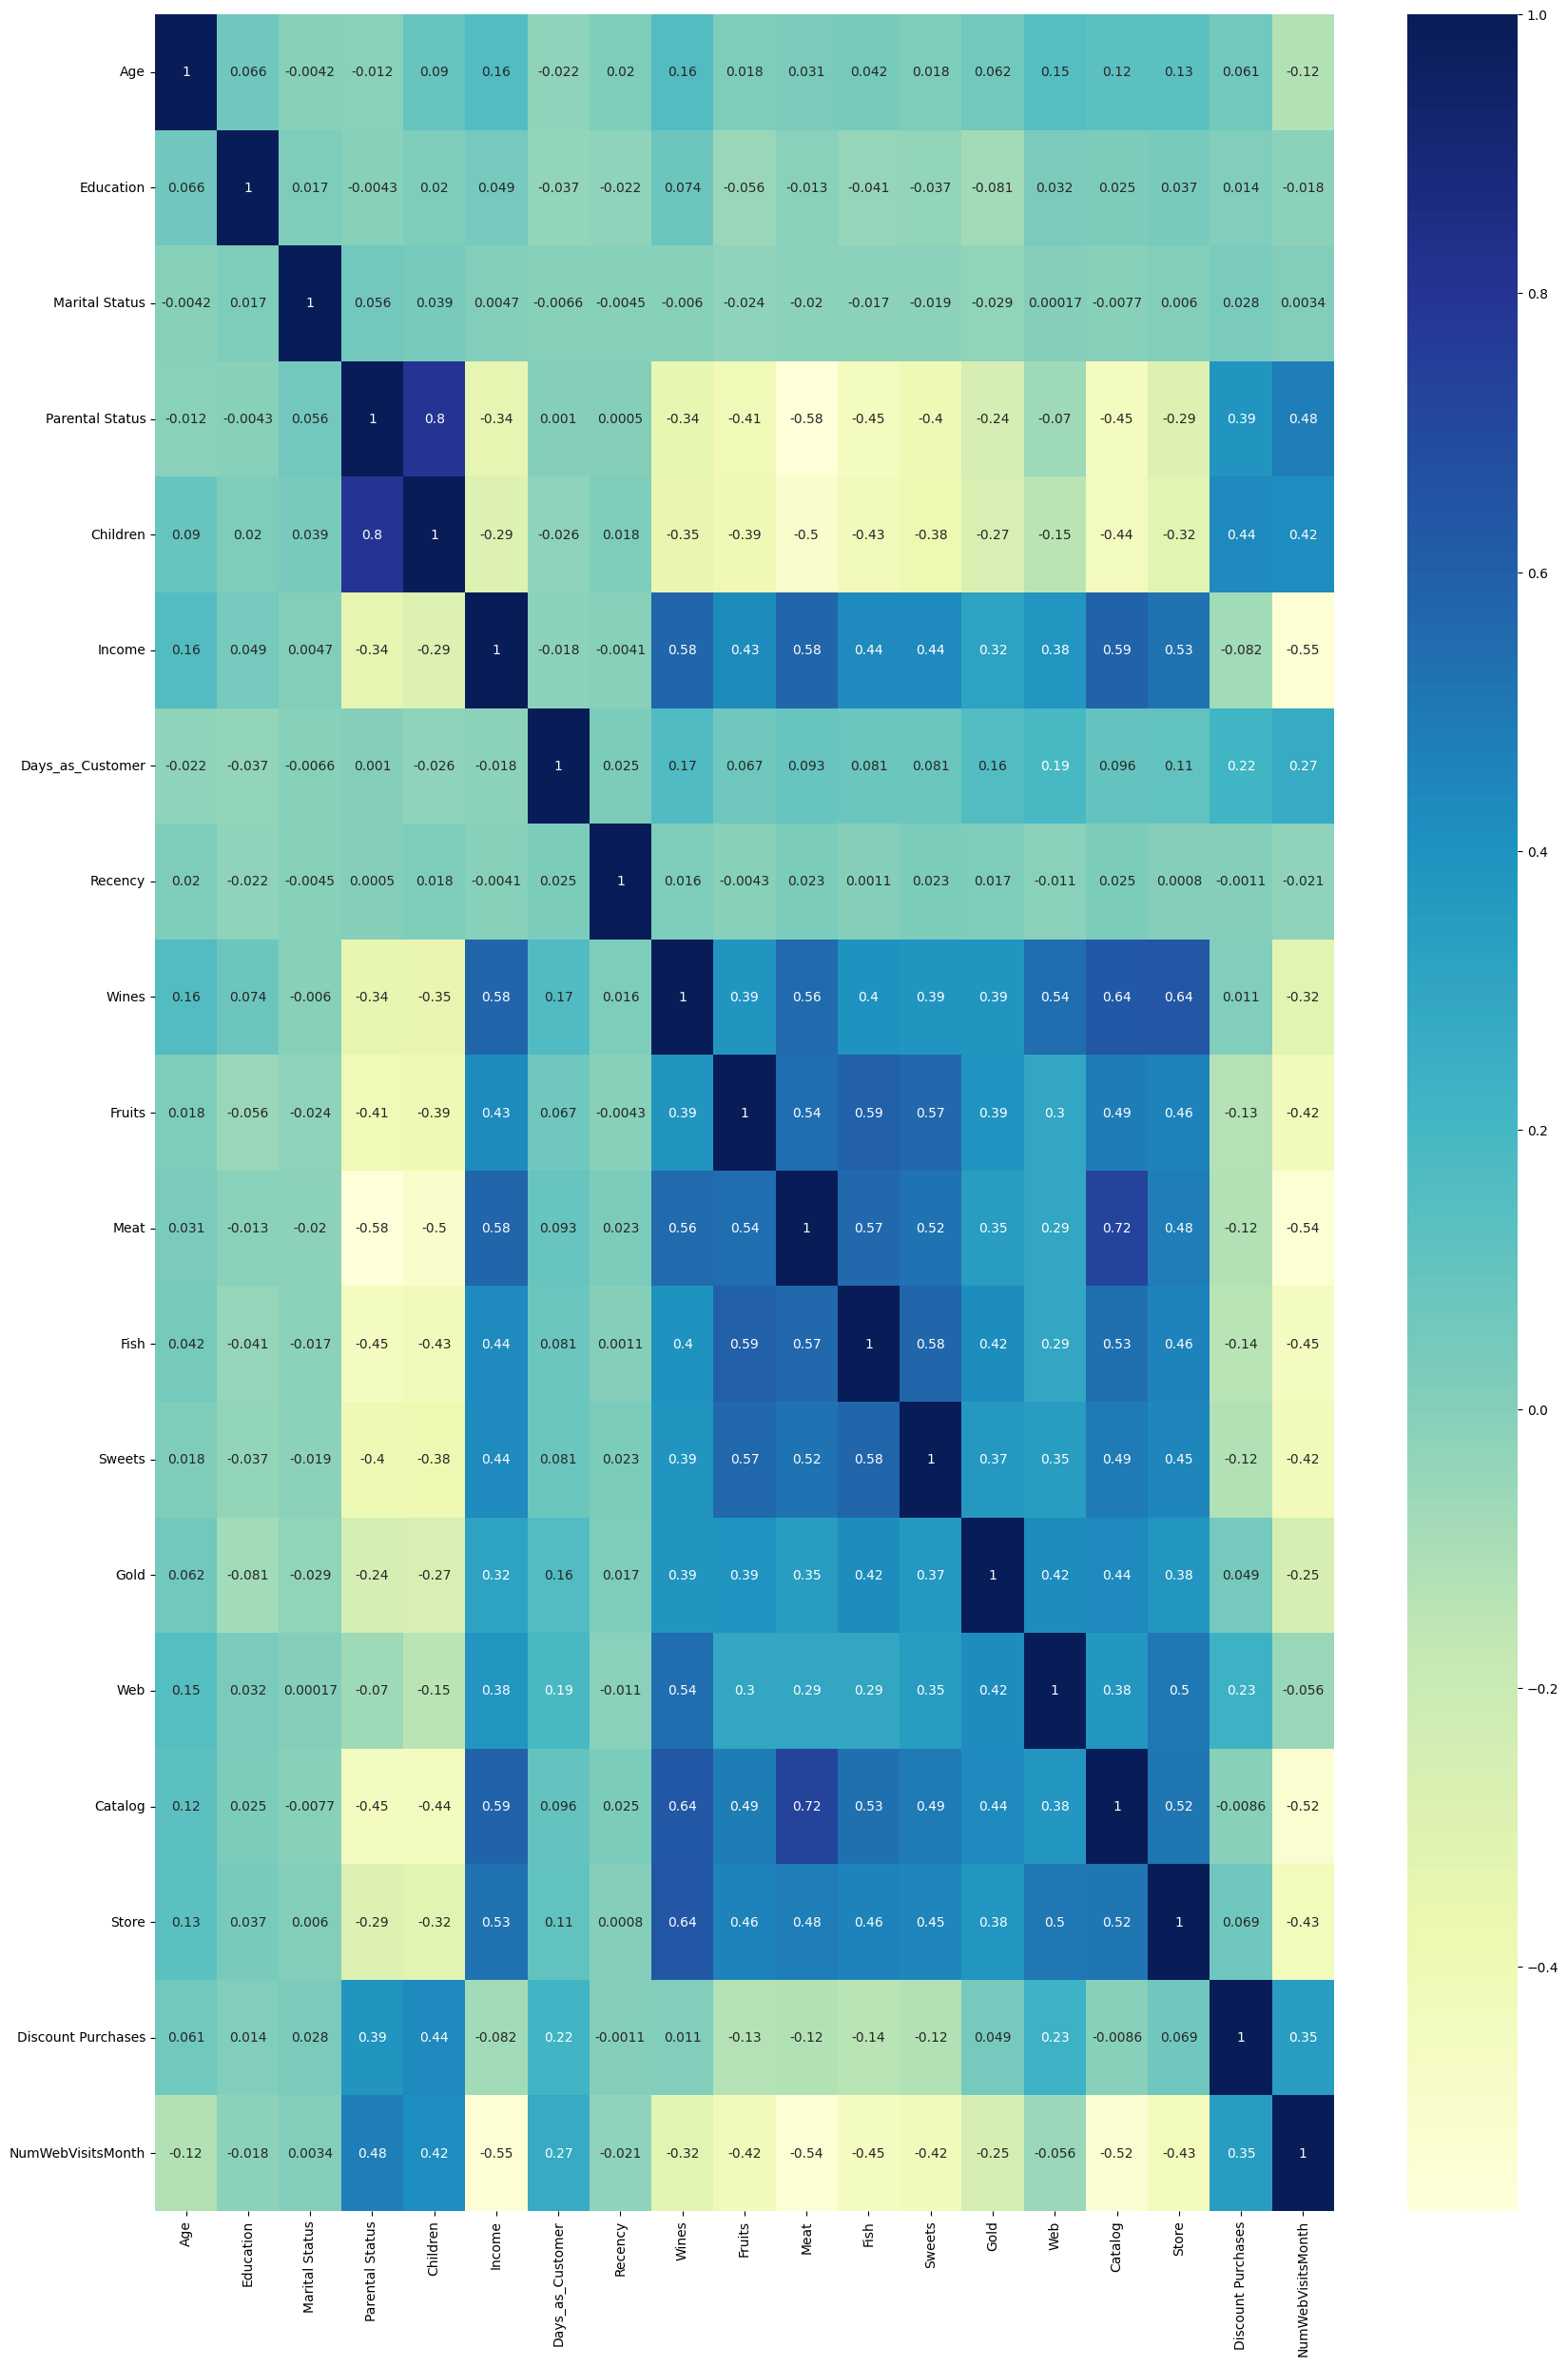

In [363]:
plt.figure(figsize = (20,30))
num_features = [feature for feature in df.columns if df[feature].dtype != 'object' and feature not in ['ID','total_spend','total_no_shopp']]
## as total_spend and total_no_shopp are the summation of other features, we will not check the correlation for them.


sns.heatmap(df[num_features].corr(), annot=True, cmap="YlGnBu")
plt.show()

In [359]:
len(df.total_no_shopp.unique())

39

### Checking Null Values


In [364]:
df.isnull().sum()

Age                   0
Education             0
Marital Status        0
Parental Status       0
Children              0
Income                0
total_spend           0
Days_as_Customer      0
Recency               0
Wines                 0
Fruits                0
Meat                  0
Fish                  0
Sweets                0
Gold                  0
Web                   0
Catalog               0
Store                 0
Discount Purchases    0
total_no_shopp        0
NumWebVisitsMonth     0
dtype: int64

## Initial Analysis Report
* There are missing values in the Income column.
* The ID column can be deleted because each row has unique values.
* There is no such target feature, so we can do clustering.

In [365]:
df.columns

Index(['Age', 'Education', 'Marital Status', 'Parental Status', 'Children',
       'Income', 'total_spend', 'Days_as_Customer', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web', 'Catalog', 'Store',
       'Discount Purchases', 'total_no_shopp', 'NumWebVisitsMonth'],
      dtype='object')

In [366]:
raw_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [375]:
df.columns

Index(['Age', 'Education', 'Marital Status', 'Parental Status', 'Children',
       'Income', 'total_spend', 'Days_as_Customer', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web', 'Catalog', 'Store',
       'Discount Purchases', 'total_no_shopp', 'NumWebVisitsMonth'],
      dtype='object')

# 4. Visualization

4.1 Do Men or Women, who are most in count?

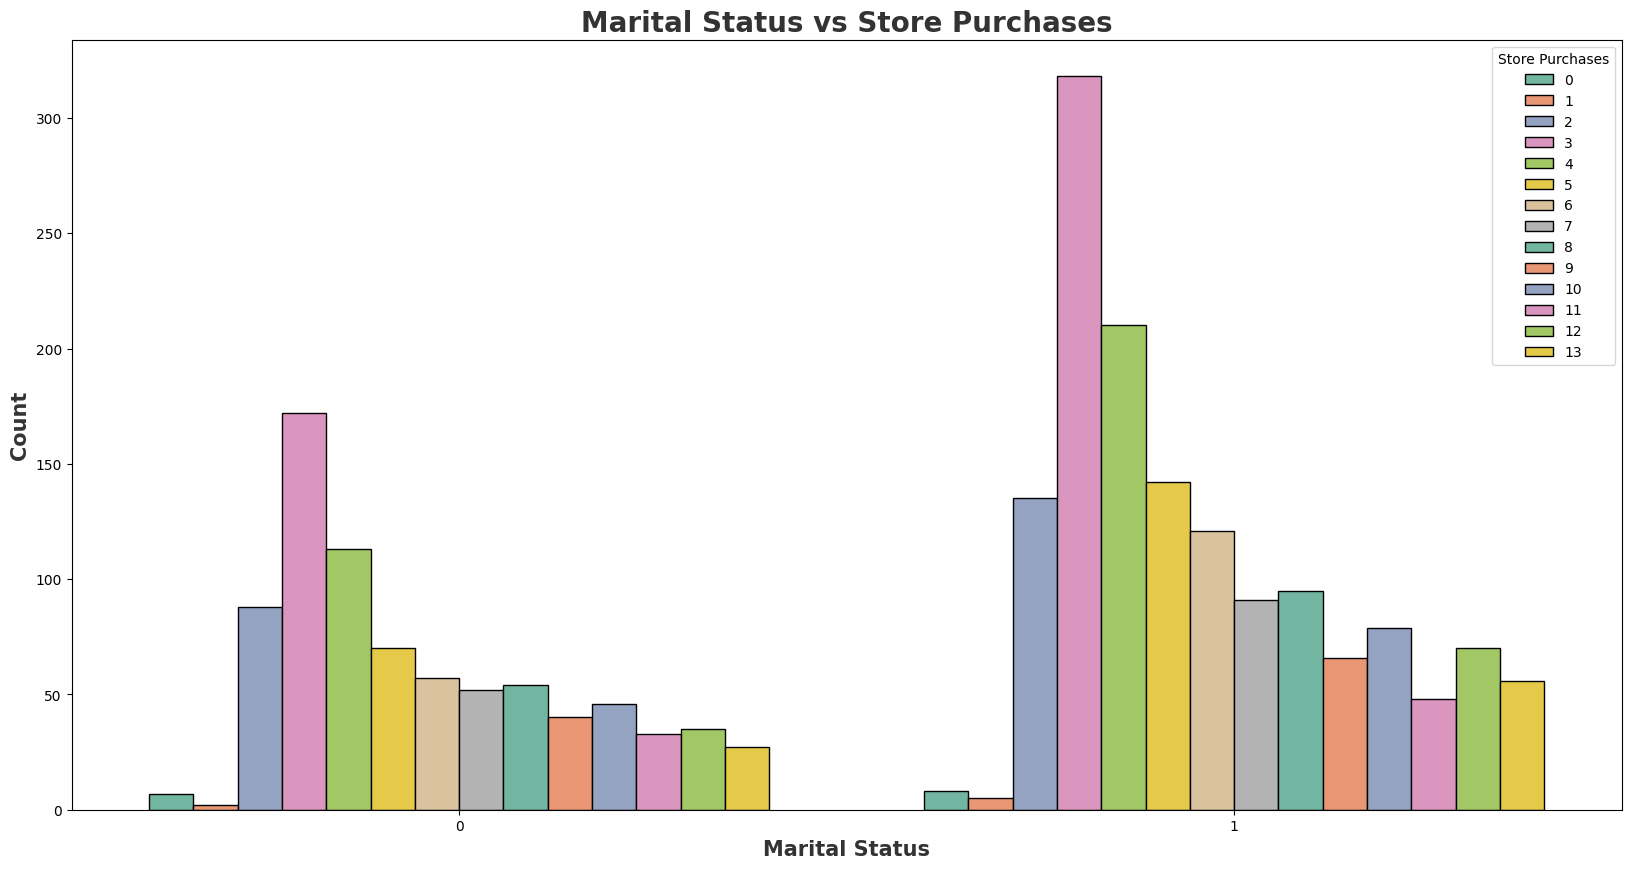

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Marital Status', data=df, palette='Set2',hue='Store',ec='black')
plt.title('Marital Status vs Store Purchases', fontsize=20, fontweight='bold', alpha=0.8)
plt.xlabel('Marital Status', fontsize=15, fontweight='bold', alpha=0.8)
plt.ylabel('Count', fontsize=15, fontweight='bold', alpha=0.8)
plt.legend(title='Store Purchases', loc='upper right')
plt.show()

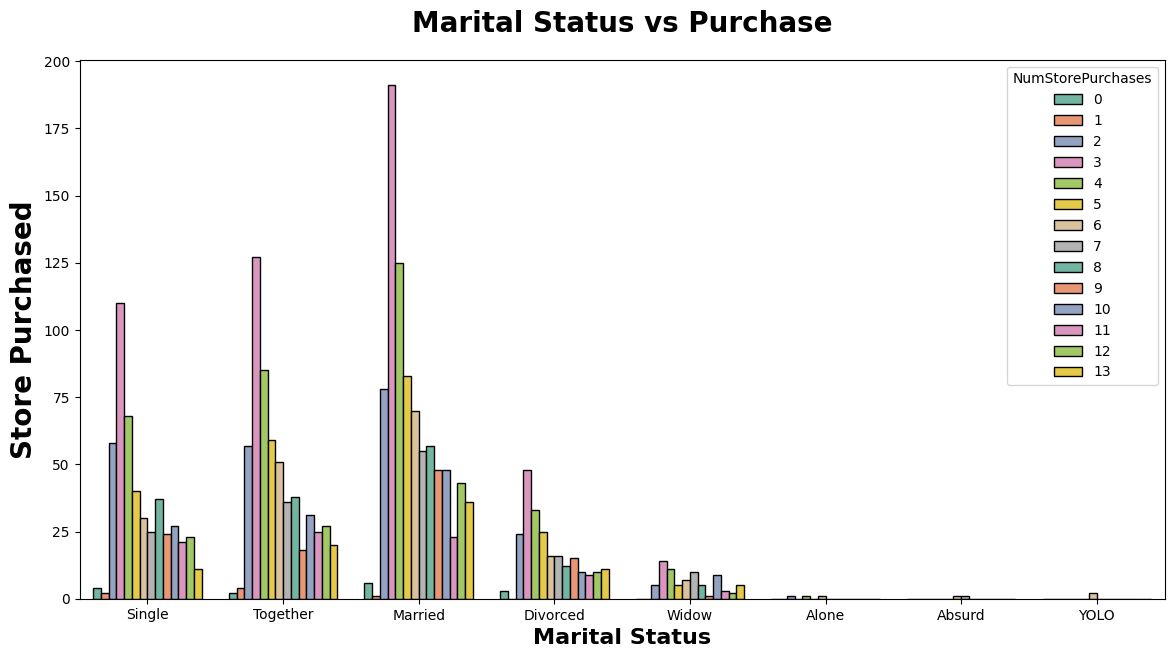

In [371]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Marital_Status",hue="NumStorePurchases", data=df1,ec = "black",palette="Set2")
plt.title("Marital Status vs Purchase", weight="bold",fontsize=20, pad=20)
plt.ylabel("Store Purchased", weight="bold", fontsize=20)
plt.xlabel("Marital Status", weight="bold", fontsize=16)
plt.show()

Report:

* As per the Chart, Married Customers bought more store products.
* Divorces, Widow, Alone, Absurd and YOLO category people baught very less.
               ________________________________________________________________________

Report:

* As per the Chart Male and Female customers who are Single has Purchased more than Divorced and Married and UnMarried.
* 33.18% of Single Customers, 24% of UnMarried Customers
* Followed by approx 13% of Divorced and Married Customers

In [372]:
df1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'year'],
      dtype='object')

In [374]:
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])
 

print(f"Newest customer's enrolment date is {max(df1['Dt_Customer'])}")
print(f"Oldest customer's enrolment date is {min(df1['Dt_Customer'])}")

Newest customer's enrolment date is 2014-06-29 00:00:00
Oldest customer's enrolment date is 2012-07-30 00:00:00


Report

* The dataset contains customer data from 2012-07-30 to 2014-06-29

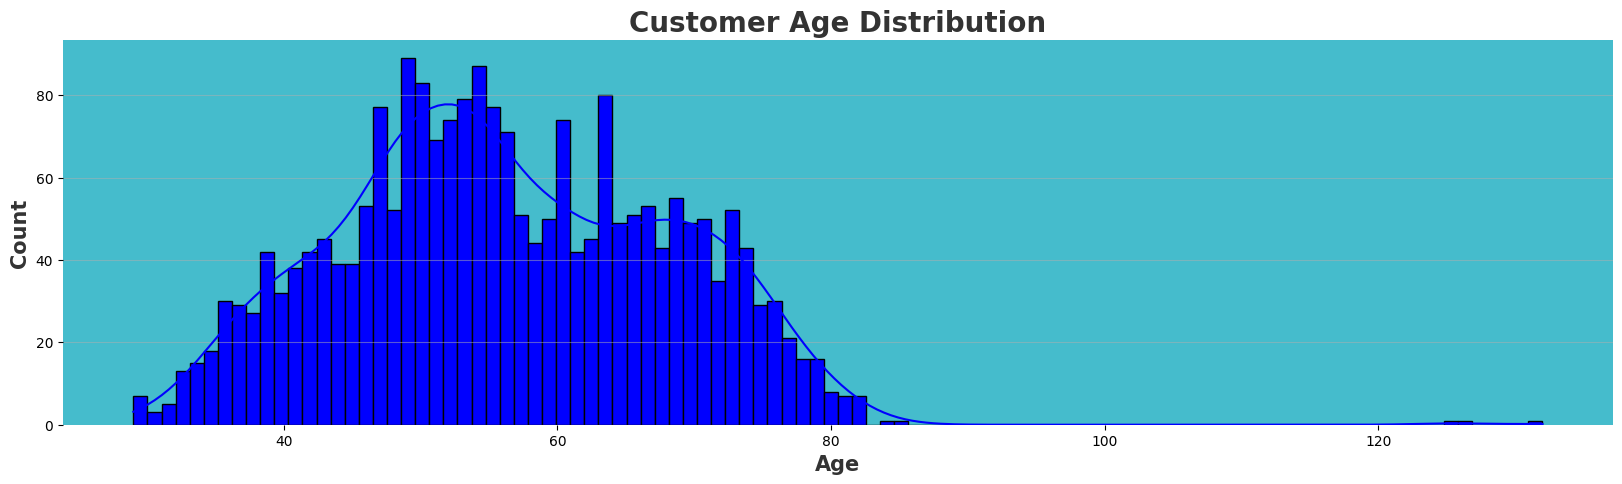

In [385]:
plt.figure(figsize=(20, 5))
ax=sns.histplot(x=df['Age'], color='blue', kde=True, bins=100, alpha=1, edgecolor='black')
plt.title('Customer Age Distribution', fontsize=20, fontweight='bold', alpha=0.8)
plt.xlabel('Age', fontsize=15, fontweight='bold', alpha=0.8)
plt.ylabel('Count', fontsize=15, fontweight='bold', alpha=0.8)
plt.grid(axis='y', linestyle='-', alpha=0.5)
sns.despine(left=True, bottom=True)

plt.gca().set_facecolor('#45bccc')
plt.show()

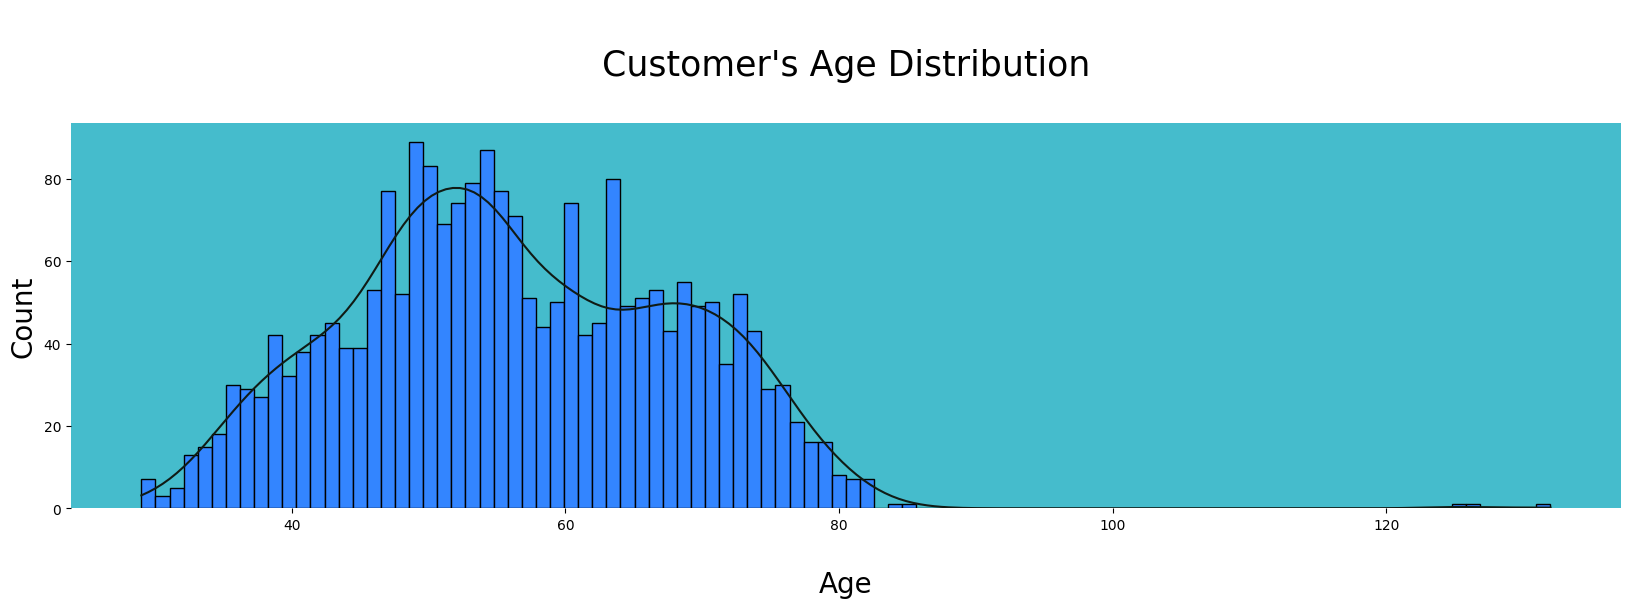

In [398]:
plt.subplots(figsize=(20, 5))
p = sns.histplot(df["Age"],color="#3385ff",kde=True,bins=100,alpha=1,fill=True,edgecolor="black")
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=25)
p.set_fc("#45bccc")
p.axes.lines[0].set_color("#101B15")
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAge",fontsize=20)
sns.despine(left=True, bottom=True)


plt.show()

reports:

* We can see it's a normal distribution of customer's age.
* We can see there's some outliers in the distribution. So we can remove the outliers from the Age column.
* As we can see most of the customers' age is 80 or less. So we can filter the data by age <90

Customer's Age Distribution

Let's have a look again on the distribution of customer's age :


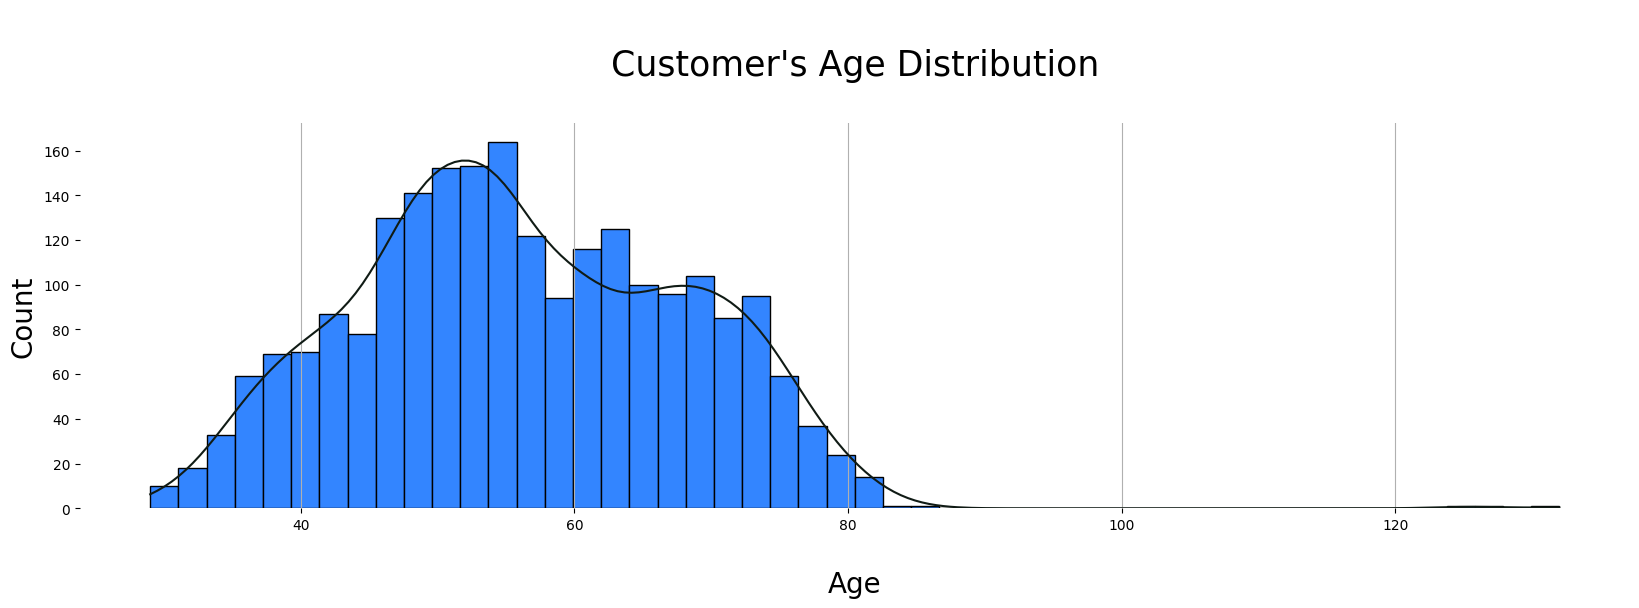

In [406]:
#let's plot now
print(f"Let's have a look again on the distribution of customer's age :")

plt.subplots(figsize=(20, 5))
p = sns.histplot(df["Age"],color="#3385ff",kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAge",fontsize=20)
sns.despine(left=True, bottom=True)
plt.grid(axis='x',alpha=1,linestyle='-')

plt.show()

report

* We can see it's a normal distribution of customer's age.
* Most of the customers are from 43 to 57.

Customer's Income-Spending Distribution


In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(x=df['Income'], color='blue', kde=True, bins=100, alpha=1, edgecolor='black',hue=df['total_spend'])
plt.title('Customer Income-Spend Distribution', fontsize=20, fontweight='bold', alpha=0.8)
plt.xlabel('Income', fontsize=15, fontweight='bold', alpha=0.8)
plt.ylabel('', fontsize=15, fontweight='bold', alpha=0.8)
plt.grid(axis='